# Sceptic Basic Usage - Simplified

This notebook shows the **simplified workflow** where Sceptic automatically handles time label encoding.

## Two Easy Ways to Use Sceptic:

1. **Direct time values**: Pass actual biological time directly (e.g., hours, days)
2. **Encoded labels + time mapping**: Pass encoded labels (0,1,2,...) with actual time points

## Method 1: Using Actual Time Values Directly (Easiest!)

In [1]:
import numpy as np
from sceptic import run_sceptic_and_evaluate

# Load data
data = np.loadtxt("../example_data/scGEM/expression.txt")
time_labels_encoded = np.loadtxt("../example_data/scGEM/expression_type.txt")

# Map to actual biological time (hours)
time_mapping = {0: 0, 1: 8, 2: 16, 3: 24, 4: 30}
time_labels_actual = np.array([time_mapping[int(t)] for t in time_labels_encoded])

print(f"First 10 time labels: {time_labels_actual[:10]}")
print(f"Unique time points: {np.unique(time_labels_actual)}")

First 10 time labels: [0 0 0 0 0 0 0 0 0 0]
Unique time points: [ 0  8 16 24 30]


In [2]:
# Run Sceptic - it automatically handles encoding!
cm, pred, pseudotime, prob = run_sceptic_and_evaluate(
    data=data,
    labels=time_labels_actual,  # Pass actual hours directly!
    method="xgboost"
)

print("Confusion Matrix:")
print(cm)
print(f"\nPseudotime range: {pseudotime.min():.1f} - {pseudotime.max():.1f} hours")

Confusion Matrix:
[[35.  0.  0.  0.  0.]
 [ 0. 38.  1.  1.  0.]
 [ 0.  2. 28.  2.  0.]
 [ 1.  2.  0. 31.  2.]
 [ 0.  0.  1.  0. 33.]]

Pseudotime range: 0.2 - 29.8 hours


## Method 2: Using Encoded Labels with Time Mapping

This is useful when you have pre-encoded labels and want to specify actual time points.

In [3]:
# Load data with encoded labels
encoded_labels = np.loadtxt("../example_data/scGEM/expression_type.txt").astype(int)

# Specify actual time points
actual_timepoints = np.array([0, 8, 16, 24, 30])

# Run Sceptic
cm, pred, pseudotime, prob = run_sceptic_and_evaluate(
    data=data,
    labels=encoded_labels,      # Encoded: 0, 1, 2, 3, 4
    label_list=actual_timepoints,  # Actual: 0, 8, 16, 24, 30 hours
    method="xgboost"
)

print(f"Pseudotime range: {pseudotime.min():.1f} - {pseudotime.max():.1f} hours")

Pseudotime range: 0.2 - 29.8 hours


## Comparison: Old vs New Workflow

### Old Workflow (Manual Encoding):
```python
from sklearn import preprocessing
import pandas as pd

# Step 1: Load labels
y = np.loadtxt("data.txt")

# Step 2: Encode labels manually
lab = preprocessing.LabelEncoder()
label = lab.fit_transform(y)

# Step 3: Create time dictionary
time_dictionary = {0: 0, 1: 8, 2: 16, 3: 24, 4: 30}
label_list = pd.Series(np.unique(label)).map(time_dictionary).to_numpy()

# Step 4: Run Sceptic
cm, pred, ptime, prob = run_sceptic_and_evaluate(
    data, label, label_list, parameters, method="xgboost"
)
```

### New Workflow (Automatic):
```python
# Just map and run!
time_mapping = {0: 0, 1: 8, 2: 16, 3: 24, 4: 30}
time_labels = np.array([time_mapping[int(t)] for t in original_labels])

cm, pred, ptime, prob = run_sceptic_and_evaluate(
    data, time_labels, method="xgboost"  # That's it!
)
```

## Visualization

The pseudotime values are now in actual biological units (hours)!

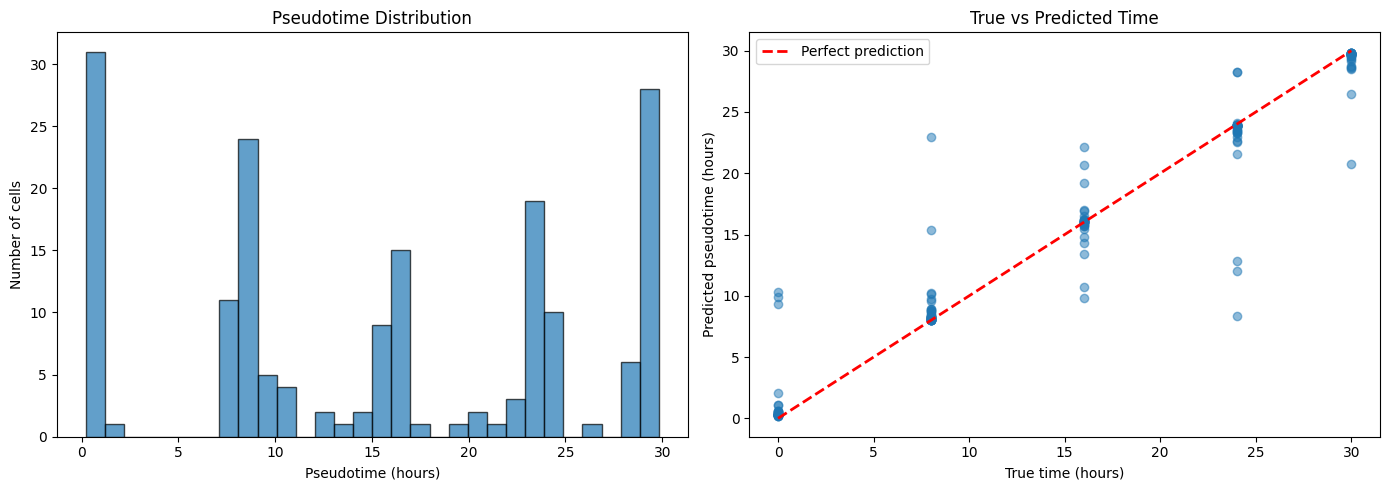

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pseudotime distribution
axes[0].hist(pseudotime, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Pseudotime (hours)')
axes[0].set_ylabel('Number of cells')
axes[0].set_title('Pseudotime Distribution')

# True time vs pseudotime
axes[1].scatter(time_labels_actual, pseudotime, alpha=0.5)
axes[1].plot([0, 30], [0, 30], 'r--', lw=2, label='Perfect prediction')
axes[1].set_xlabel('True time (hours)')
axes[1].set_ylabel('Predicted pseudotime (hours)')
axes[1].set_title('True vs Predicted Time')
axes[1].legend()

plt.tight_layout()
plt.show()

## Summary

**Key Improvements:**

1. ✅ **No manual label encoding needed** - Sceptic handles it automatically
2. ✅ **Pass actual time values directly** - More intuitive and less error-prone  
3. ✅ **Pseudotime in meaningful units** - Results are directly interpretable
4. ✅ **Backward compatible** - Old code still works!

**Quick Reference:**
```python
# Easiest way:
run_sceptic_and_evaluate(data, actual_time_labels, method="xgboost")

# With time mapping:
run_sceptic_and_evaluate(
    data, 
    encoded_labels, 
    label_list=actual_timepoints,
    method="xgboost"
)
```